##  From <font color='organge'>"manual"</font> learning to <font color='brown'>"machine"</font> learning
### A Simple linear classifier inTF (logistic regression)   

* <font size=4 color='green'>MSTC seminar on Deep Learning & Tensorflow</font>

In [1]:
import tensorflow as tf

### Generate two-class artificial data using <font color='gree'>numpy</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Number of data per-class
Ndata_class=100

group1 = np.random.multivariate_normal([-4, -4], 20*np.identity(2), size=Ndata_class)
group2 = np.random.multivariate_normal([4, 4], 20*np.identity(2), size=Ndata_class)

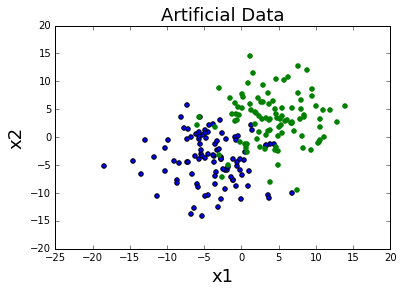

In [3]:
# Plot artificial data
plt.scatter(group1.T[0][:],group1.T[1][:])
plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Artificial Data',fontsize=18)

### "manual" linear discrimination
* x2= w1 * x1 + b
<br>or
* x2 - w1*x1 - b = 0

In [4]:
x1 = np.arange(-10, 10, 0.1)

b=0.5
w1=-1.0


x2= w1 * x1 + b 

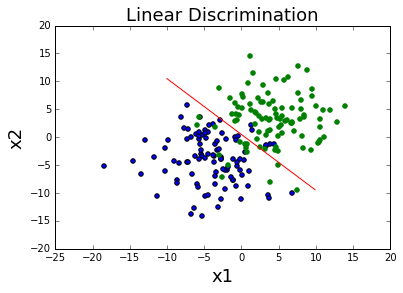

In [5]:
# Plot linear discrimination
plt.scatter(group1.T[0][:],group1.T[1][:])
plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
plt.plot(x1,x2,color='r')
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Linear Discrimination',fontsize=18)



### Classification based on the distance to the line

* x2 - w1*x1 - b > 0  'green' points
* x2 - w1*x1 - b < 0  'blue' points


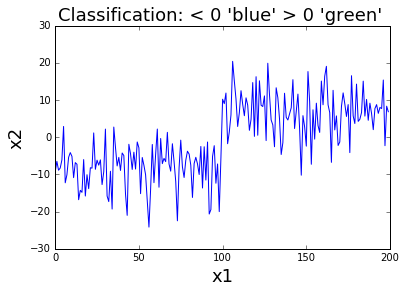

In [6]:
train_X = np.vstack((group1, group2))
pred= train_X.T[1] - w1 * train_X.T[0] - b 
plt.plot(pred)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Classification: < 0 \'blue\' > 0 \'green\' ',fontsize=18)

### let's make these values "probabilities" using the sigmoid function

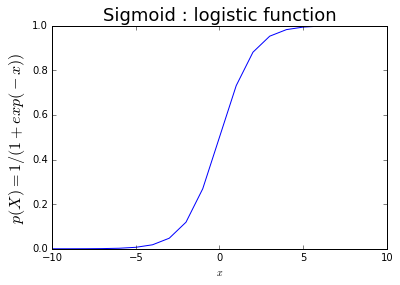

In [7]:
x = np.arange(-10, 11)
plt.title('Sigmoid : logistic function',fontsize=18)
plt.xlabel('$x$')
plt.ylabel('$p(X)=1/(1+exp(-x))$',fontsize=16)
plt.plot(x, (1/(1+np.exp(-x))));



####     Prediction using the logistic or sigmoid function 
* $p(X) = 1/(1 + \exp(x))$, taking values between $0$ and $1$.

* $p(X)$ represents the probability that the point $X$ should be labelled "green".


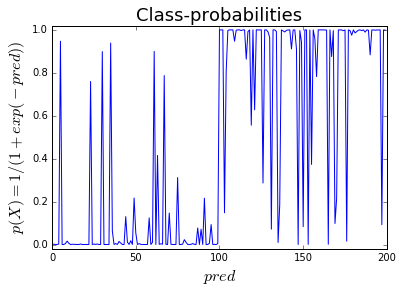

In [8]:
plt.plot((1/(1+np.exp(-pred))))
plt.ylim(-0.02, 1.02)

plt.title('Class-probabilities',fontsize=18)
plt.xlabel('$pred$',fontsize=16)
plt.ylabel('$p(X)=1/(1+exp(-pred))$',fontsize=16)

###  Classification cost function will be the cross-entropy, $$-\sum_{i=1}^n l(X_i) \log(p(X_i)) + (1-l(X_i))\log(1-p(X_i)),$$ where $l(X_i)$ is the label of $X_i$ (which is $0$ for 'blue' or $1$ for 'green').


In [9]:
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)

In [10]:
# Cost function is cross-entropy
pred_prob=(1/(1+np.exp(-pred)))
cost = -sum((train_labels) * np.log(pred_prob + 1e-10) + (1-train_labels) * np.log(1-pred_prob + 1e-10))

print "cross-entropy: {}".format(cost)

cross-entropy: 68.3663057447


### Feeding data into a given linear classifier with sigmoid output

In [11]:
# Inputs are now two-dimensional and come with labels "blue" or "green" (represented by 0 or 1)
X = tf.placeholder("float", shape=[None, 2])
labels = tf.placeholder("float", shape=[None])


# Set model weights and bias as before
#W = tf.Variable(tf.zeros([2, 1], "float"), name="weight")
#b = tf.Variable(tf.zeros([1], "float"), name="bias")

W=tf.constant([[1.0], [1.0]],name="weights")
b=tf.constant(-0.5,name="bias")


# Predictor is now the logistic function
#pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W), axis=[1]) + b))
pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W),1) + b))

# Cost function is cross-entropy
cost = -tf.reduce_sum(tf.to_double(labels) * tf.log(pred) + (1-tf.to_double(labels)) * tf.log(1-pred))


# Initializing the variables
#init = tf.global_variables_initializer()
init = tf.initialize_all_variables()

# We stack our two groups of 2-dimensional points
train_X = np.vstack((group1, group2))

# labels to feed them
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


with tf.Session() as sess:
    
    sess.run(init)
    
    pred, cost=sess.run([pred, cost], feed_dict={X: train_X, labels: train_labels})

        

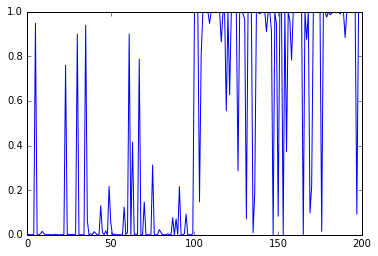

In [12]:
plt.plot(pred)

In [13]:
print "cross-entropy: {}".format(cost)

cross-entropy: 68.3663087275


## Now let's train!

In [14]:
# Inputs are now two-dimensional and come with labels "blue" or "green" (represented by 0 or 1)
X = tf.placeholder("float", shape=[None, 2])
labels = tf.placeholder("float", shape=[None])

# Set model weights and bias as before
W = tf.Variable(tf.zeros([2, 1], "float"), name="weight")
b = tf.Variable(tf.zeros([1], "float"), name="bias")

# Predictor is now the logistic function
#pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W), axis=[1]) + b))
pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W),1) + b))


# Cost function is cross-entropy
cost = -tf.reduce_sum(tf.to_double(labels) * tf.log(pred) + (1-tf.to_double(labels)) * tf.log(1-pred))

# Gradient descent
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
#init = tf.global_variables_initializer()
init = tf.initialize_all_variables()

# We stack our two groups of 2-dimensional points
train_X = np.vstack((group1, group2))

# labels to feed them
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


with tf.Session() as sess:
    sess.run(init)
    
    # We can Run the optimization algorithm several times
    for i in range(10):
        cost_out,W_out,b_out,_=sess.run([cost, W,b, optimizer], feed_dict={X: train_X, labels: train_labels})
        print("Epoch : %d Cost= %s "%(i,cost_out))
        print(W_out)
        print(b_out)
        
    

Epoch : 0 Cost= 138.629436112 
[[ 0.40783983]
 [ 0.35413086]]
[ 0.]
Epoch : 1 Cost= 46.7551004628 
[[ 0.42398268]
 [ 0.35520816]]
[ 0.00268775]
Epoch : 2 Cost= 46.5153300191 
[[ 0.43649551]
 [ 0.35705754]]
[ 0.0053419]
Epoch : 3 Cost= 46.3644534019 
[[ 0.44639802]
 [ 0.35927331]]
[ 0.00796523]
Epoch : 4 Cost= 46.26414424 
[[ 0.45436653]
 [ 0.36160824]]
[ 0.0105602]
Epoch : 5 Cost= 46.1944099454 
[[ 0.46086681]
 [ 0.36391625]]
[ 0.01312851]
Epoch : 6 Cost= 46.1441070089 
[[ 0.4662295 ]
 [ 0.36611494]]
[ 0.01567116]
Epoch : 7 Cost= 46.1066635038 
[[ 0.47069553]
 [ 0.36816159]]
[ 0.01818863]
Epoch : 8 Cost= 46.0780047355 
[[ 0.47444427]
 [ 0.37003785]]
[ 0.02068103]
Epoch : 9 Cost= 46.0555064266 
[[ 0.47761196]
 [ 0.37174025]]
[ 0.02314829]


### Now we train using batches


('W = ', array([[ 0.4867278],
       [ 0.374962 ]], dtype=float32))
('b = ', array([ 0.22612391], dtype=float32))


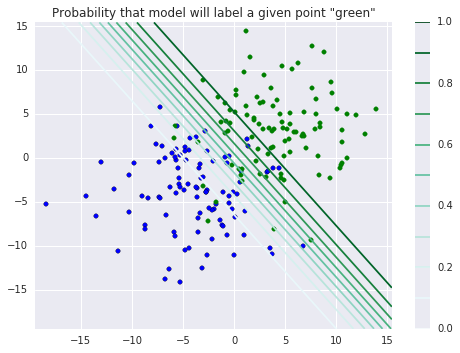

In [15]:
import matplotlib.cm as cm
import seaborn as sns

n_samples=200
batch_size=40

with tf.Session() as sess:
    # We stack our two groups of 2-dimensional points and label them 0 and 1 respectively
    train_X = np.vstack((group1, group2))

    # labels to feed them
    train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


    sess.run(init)

    # Run the optimization algorithm 1000 times
    for i in range(1000):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, labels_batch = train_X[indices], train_labels[indices]
        sess.run(optimizer, feed_dict={X: X_batch, labels: labels_batch})

        
    # Plot the predictions: the values of p
    Xmin = np.min(train_X)-1
    Xmax = np.max(train_X)+1
    x = np.arange(Xmin, Xmax, 0.1)
    y = np.arange(Xmin, Xmax, 0.1)
    

    plt.scatter(group1.T[0][:],group1.T[1][:])
    plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
    plt.xlim(Xmin, Xmax)
    plt.ylim(Xmin, Xmax)
    print('W = ', sess.run(W))
    print('b = ', sess.run(b))
    
    xx, yy = np.meshgrid(x, y)
    predictions = sess.run(pred, feed_dict={X: np.array((xx.ravel(), yy.ravel())).T})
    
    plt.title('Probability that model will label a given point "green"')
    plt.contour(x, y, predictions.reshape(len(x), len(y)), cmap=cm.BuGn, levels=np.arange(0.0, 1.1, 0.1))
    plt.colorbar()

## Logistic regression in TensorFlow

https://gist.github.com/fuglede/ad04ce38e80887ddcbeb6b81e97bbfbc

